# 1. Introduction

A point cloud is a 3D representation suitable for processing real-world data, especially when the geometry of the scene/objects is required, such as the distance, the shape and the size of objects.

More formally, a point cloud PCD is a set of n points where each point Pi is represented by its 3D coordinates :

$$
PCD = \left\{ P_i(x_i, y_i, z_i) : i = 1, \ldots, n \right\}.
$$

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### 1.1 Random Point Cloud

In [2]:
# Let's create a point cloud with 5 random points
n = 5
pcd = np.random.rand(n, 3) # uniform distribution over [0, 1]
print(pcd)

[[0.95244882 0.37282949 0.1447646 ]
 [0.49154625 0.43141729 0.64326279]
 [0.3147495  0.23816303 0.06967414]
 [0.54937181 0.74318284 0.8074487 ]
 [0.17071423 0.0288487  0.02019849]]


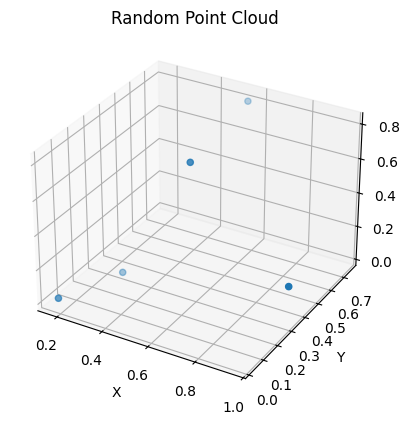

In [3]:
# Visualize the point cloud
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd[:, 0], pcd[:, 1], pcd[:, 2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Random Point Cloud')
plt.show()


### 1.2 Sampled point cloud

Sometimes processing 3D models directly takes time and memory. Therefore sampling point clouds from their 3D surfaces is a potential solution. Let's import the bunny model from the Open3D dataset

In [12]:
bunny = o3d.data.BunnyMesh()
pcd = o3d.io.read_point_cloud(bunny.path)

# Visualize the pcd
o3d.visualization.draw_geometries([pcd])


**Voxel downsampling** is a technique used in point cloud processing to reduce the number of points in a point cloud while preserving the underlying structure and features of the original data. It involves dividing the 3D space occupied by the point cloud into small voxels, or 3D cubes, and keeping only one point from each voxel. **The point selected from each voxel is typically the centroid or the closest point to the center of the voxel.**

In [ ]:
# voxel downsample the point cloud
pcd_sample = pcd.voxel_down_sample(voxel_size=0.01) # voxel size determines the resolution of the downsampled point cloud

print(f"Original point cloud: {len(pcd.points)} points")
print(f"Point cloud after voxel downsampling: {len(pcd_sample.points)} points")

# visualize:
o3d.visualization.draw_geometries([pcd_sample])

Original point cloud: 35947 points
Point cloud after voxel downsampling: 795 points


In [21]:
import os

# save into ply file:
if not os.path.exists("output"):
    os.makedirs("output")

o3d.io.write_point_cloud("output/bunny_downsampled.ply", pcd_sample)

True

### 1.3 Point Clouds from RGB-D data

RGB-D data is collected using RGB-D sensors (e.g. Microsoft Kinect) which simultaneously provide an RGB image and a depth image.

Each pixel in the depth image indicates its distance from the camera.

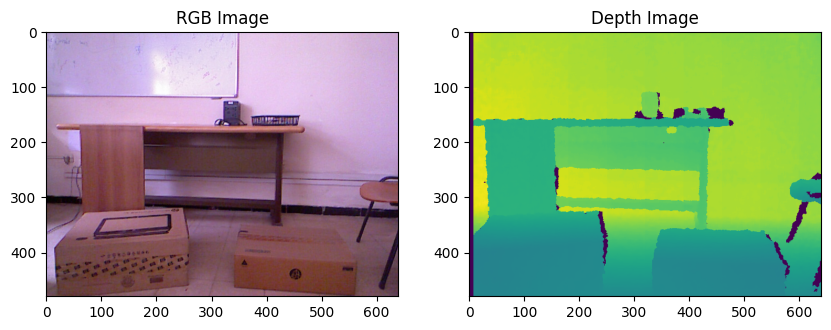

In [ ]:
# visualize rgb and depth image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

rgb = './data/rgb.jpg'
depth = './data/depth.png' # a grayscale image where pixel intensity represents depth

axes[0].imshow(plt.imread(rgb))
axes[0].set_title('RGB Image')

axes[1].imshow(plt.imread(depth))
axes[1].set_title('Depth Image')

plt.show()


In [24]:
# read the color and the depth image:
color_raw = o3d.io.read_image("./data/rgb.jpg")
depth_raw = o3d.io.read_image("./data/depth.png")

# create an RGBD image object:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw, convert_rgb_to_intensity=False)

# use the rgbd image to create point cloud:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

# visualize
o3d.visualization.draw_geometries([pcd])

# 2. Open3D and NumPy

Sometimes you will need to switch between Open3D and NumPy representations. For example, let’s say we want to convert a NumPy point cloud to an Open3D.PointCloud object for visualization, and visualize the 3D model of bunny using Matplotlib.

### 2.1 From numpy to open3d

In [28]:
# create numpy pointcloud:
n = 2000
pcd_np = np.random.rand(n, 3)

# Convert to Open3D PointCloud
pcd_o3d = o3d.geometry.PointCloud() # create a point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd_np) # set pcd_np to point cloud points

# visualize
o3d.visualization.draw_geometries([pcd_o3d])

### 2.2 From open3d to numpy

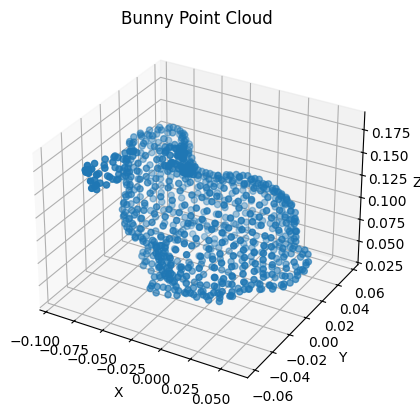

In [32]:
# Read the bunny point cloud file:
pcd_o3d = o3d.io.read_point_cloud("output/bunny_downsampled.ply")

# Convert to numpy array:
pcd_np = np.asarray(pcd_o3d.points)

# Display using matplotlib:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd_np[:, 0], pcd_np[:, 2], pcd_np[:, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bunny Point Cloud')
plt.show()